In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import nltk
from sklearn import metrics

In [4]:
train_data = pd.read_csv('sign_mnist_train.csv')
# test_data = pd.read_csv('sign_mnist_test.csv')

In [5]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [6]:
# Labels as y

y = train_data.iloc[:, 0]

In [7]:
# Get data points as matrix for training

train_data_f = np.array(train_data.loc[:, train_data.columns != 'label'])
train_data_f[np.isnan(train_data_f)] = 0

In [8]:
train_data_f.shape

(27455, 784)

In [9]:
# Normalizing Train Data - Subtracting mean and Dividing by SD
train_mean = np.mean(train_data_f)
train_sd = np.std(train_data_f)
train_norm = (train_data_f - train_mean)/train_sd

In [10]:
train_norm.shape

(27455, 784)

In [11]:
# x_train = train_norm.reshape((27455,28,28))

In [13]:
# x_train = x_train.reshape((-1,28,28, 1))

In [14]:
# x_train.shape

(27455, 28, 28, 1)

In [16]:
# ANN Training libraries import

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from sklearn.utils import shuffle
tf.random.set_seed(42)

from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# from sklearn import metricsfrom sklearn.utils import shuffle
# from sklearn.model_selection import train_test_splitimport matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
# import randomfrom numpy import *
from PIL import Image
# import theano

In [50]:
def build_model():

    model = tf.keras.Sequential([
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2()),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2()),
      tf.keras.layers.Dense(128, activation='relu'),
      # tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(units=25, activation='softmax') #
    ])
    
    model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy'])
    print (model.summary)

    return model

In [19]:
y_train = tf.keras.utils.to_categorical(y)

In [51]:
model = build_model()
history = model.fit(train_norm, y_train, batch_size=16, epochs = 10)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f912db94850>>
Epoch 1/10
1716/1716 [==============================] - 8s 4ms/step - loss: 3.1831 - auc: 0.8877 - precision_16: 0.6598 - recall_16: 0.1503 - accuracy: 0.3362
Epoch 2/10
1716/1716 [==============================] - 8s 5ms/step - loss: 2.1338 - auc: 0.9492 - precision_16: 0.7420 - recall_16: 0.3330 - accuracy: 0.5215
Epoch 3/10
1716/1716 [==============================] - 8s 5ms/step - loss: 2.0185 - auc: 0.9583 - precision_16: 0.7653 - recall_16: 0.3928 - accuracy: 0.5706
Epoch 4/10
1716/1716 [==============================] - 7s 4ms/step - loss: 1.9554 - auc: 0.9636 - precision_16: 0.7720 - recall_16: 0.4344 - accuracy: 0.5989
Epoch 5/10
1716/1716 [==============================] - 8s 5ms/step - loss: 1.9288 - auc: 0.9657 - precision_16: 0.7772 - recall_16: 0.4596 - accuracy: 0.6169
Epoch 6/10
1716/1716 [==============================] - 8s 4ms/step - loss: 1.9068 - auc: 0.9676 - precision_16

In [53]:
print(history.history.keys())
train_loss = history.history['loss']
train_auc = history.history['auc']
train_acc = history.history['accuracy']
train_recall = history.history['recall_16']
train_prec = history.history['precision_16']

dict_keys(['loss', 'auc', 'precision_16', 'recall_16', 'accuracy'])


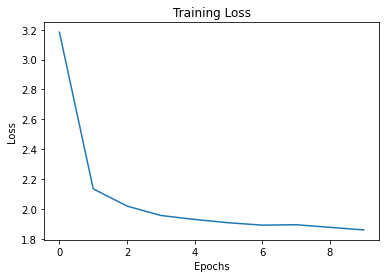

In [54]:
plt.plot(list(range(0,10)), train_loss)
 
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

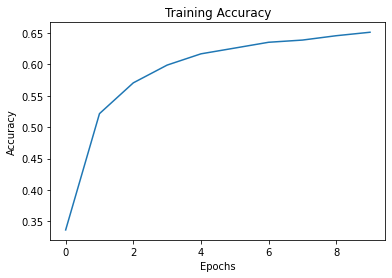

In [55]:
plt.plot(list(range(0,10)), train_acc)
 
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

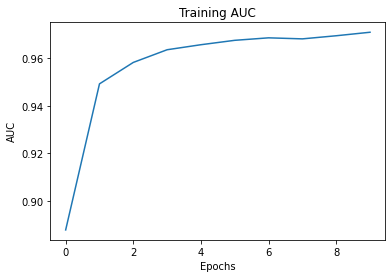

In [56]:
plt.plot(list(range(0,10)), train_auc)
 
plt.title('Training AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')

plt.show()

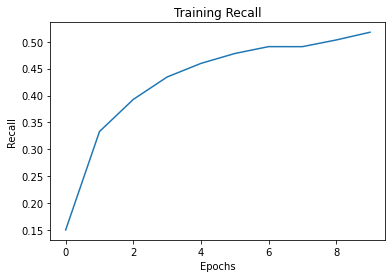

In [57]:
plt.plot(list(range(0,10)), train_recall)
 
plt.title('Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')

plt.show()

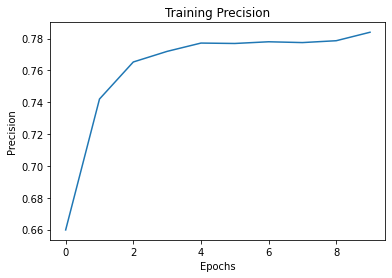

In [58]:
plt.plot(list(range(0,10)), train_prec)
 
plt.title('Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')

plt.show()